# Iris Version
* Source https://yamalab.tistory.com/31

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [36]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Data Exploration
* source : [데이터 사이언스 스쿨 알파(05.01 분류용 예제 데이터)](https://datascienceschool.net/view-notebook/577a01e24d4f456bb5060da6e47054e1/)
* DataFrame로 만들어서 작업




In [32]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


* 각 특징값의 분포와 상관관계를 히스토그램과 스캐터플롯으로 나타내면 다음과 같다.

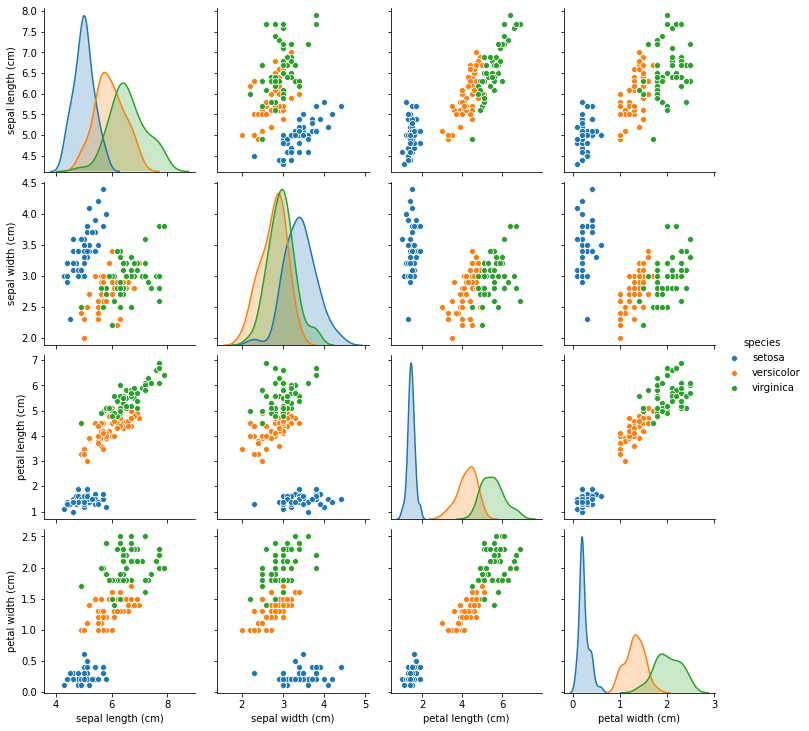

In [33]:
sns.pairplot(df, hue="species")
plt.show()

* 이 분포를 잘 살펴보면 꽃잎의 길이만으로도 세토사와 다른 종을 분류할 수 있다는 것을 알 수 있다.

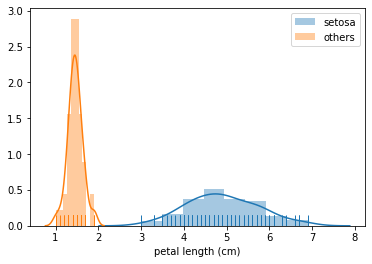

In [34]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

# Data Preparation

In [37]:
X = iris.data[:, 0:4]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


In [42]:
# Apt install for graphviz
!x=$(cat /etc/apt/sources.list|grep "http://kr.archive.ubuntu.com/ubuntu/");[ ${#x} -eq 0 ] && echo "deb http://kr.archive.ubuntu.com/ubuntu/ bionic universe" >> /etc/apt/sources.list
!apt update --upgrade
!apt install python-pydot python-pydot-ng graphviz
!pip install pydotplus
    

Hit:1 http://mirror.kakao.com/ubuntu bionic InRelease
Hit:2 http://kr.archive.ubuntu.com/ubuntu bionic InRelease                     
Reading package lists... Done
Building dependency tree       
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
python-pydot is already the newest version (1.2.3-1).
python-pydot-ng is already the newest version (1.0.0-3).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Looking in indexes: http://aicentro-nexus-svc:8081/hub-nexus/repository/pypi-group/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


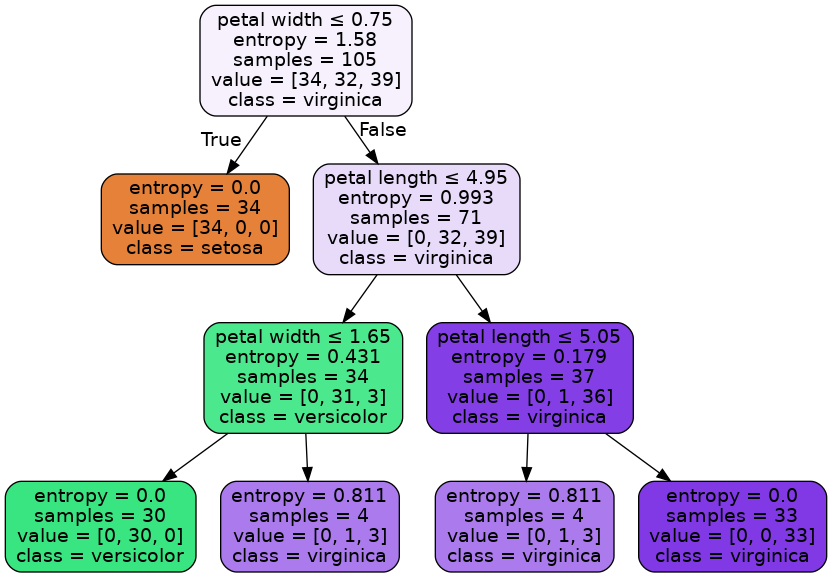

In [43]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['sepal length', 'sepal width','petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())